## Linear vs. Ridge vs. Lasso Regression

- **Linear Regression:** models the relationship between dependent and independent variables but struggles with multicollinearity and high-dimensional data.
- **Ridge Regression:** adds L2 regularization (penalizing squared coefficients) to handle multicollinearity.
- **Lasso Regression:** adds L1 regularization (penalizing absolute coefficients), performing automatic feature selection.

### When to Use Each Model

- **Linear Regression**: Best for simple models with few features and no multicollinearity.
- **Ridge Regression**: Preferred when multicollinearity is present.
- **Lasso Regression**: Ideal for high-dimensional data requiring feature selection.

### Key Differences

| Feature            | Linear Regression | Ridge Regression | Lasso Regression |
|--------------------|------------------|------------------|------------------|
| Regularization    | None             | L2 (squared)     | L1 (absolute)    |
| Feature Selection | No               | No               | Yes              |
| Complexity        | Low              | Medium           | High             |
| Interpretability  | High             | Medium           | Low              |
| Performance      | Poor with many features | Improves multicollinearity | Best for large feature sets |
| Training Speed   | Fast             | Slower than Linear | Slowest          |
| Hyperparameters  | None             | Alpha (tunable)  | Alpha (tunable)  |

### Use Cases

- **Linear**: Small datasets without multicollinearity.
- **Ridge**: Large datasets with multicollinearity.
- **Lasso**: Large datasets where feature selection is needed.

In [22]:
# imports
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

X.shape, y.shape

((100, 1), (100,))

In [24]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Train a simple Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [27]:
# Train a Ridge Regression model
ridge = Ridge(alpha=10)  # Alpha controls regularization strength
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

In [28]:
# Train a Lasso Regression model
lasso = Lasso(alpha=1)  # Alpha controls regularization strength
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [29]:
# Evaluate models
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lr = r2_score(y_test, y_pred_lr)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [30]:
print(f"Linear Regression - MSE: {mse_lr:.2f}, R2 Score: {r2_lr:.2f}")
print(f"Ridge Regression - MSE: {mse_ridge:.2f}, R2 Score: {r2_ridge:.2f}")
print(f"Lasso Regression - MSE: {mse_lasso:.2f}, R2 Score: {r2_lasso:.2f}")

Linear Regression - MSE: 416.81, R2 Score: 0.80
Ridge Regression - MSE: 457.85, R2 Score: 0.78
Lasso Regression - MSE: 421.86, R2 Score: 0.80


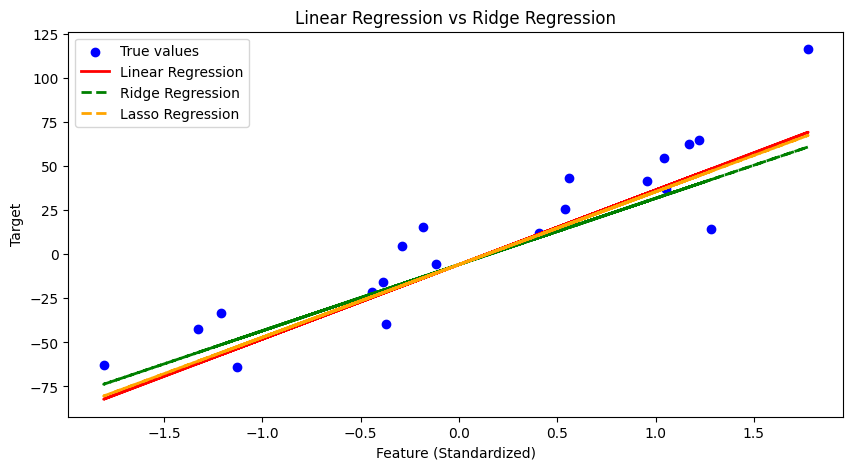

In [31]:
# Plot results
plt.figure(figsize=(10,5))
plt.scatter(X_test_scaled, y_test, color='blue', label='True values')
plt.plot(X_test_scaled, y_pred_lr, color='red', label='Linear Regression', linewidth=2)
plt.plot(X_test_scaled, y_pred_ridge, color='green', linestyle='dashed', label='Ridge Regression', linewidth=2)
plt.plot(X_test_scaled, y_pred_lasso, color='orange', linestyle='dashed', label='Lasso Regression', linewidth=2)
plt.legend()
plt.title("Linear Regression vs Ridge Regression")
plt.xlabel("Feature (Standardized)")
plt.ylabel("Target")
plt.show()